In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# Kunskapskontroll

### Fyll i uppgifterna nedan innan du lämnar in på LearnPoint: 
Namn på samtliga gruppmedlemmar: 

# Project Steps

* Import & Analyze the Data
* Analyze features & measue feature importance
* Clean up data missing values
* Transform Data
* Build pipeline (-> Transform data, Scale Data )
* GridSearch parametergrid for models
* Validate model
* Test model

# Code

#### Loading Data

In [2]:
# Importing Data
imported_data = pd.read_csv(r'.\kunskapskontroll_ai2_del1\housing.csv')
imported_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
data = imported_data

# Creating new feature columns in the Dataset
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
data['population_per_household'] = data['population'] / data['households']


# Transforming 'ocean_proximity' feature using dummy variable encoding
data = pd.get_dummies(data, columns=['ocean_proximity'])

data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,False,False,False,True,False


In [16]:
# List of features used for the training data:

housing_features = [
    'longitude',
    'latitude',
    'median_income',
    'rooms_per_household',
    'bedrooms_per_household',
    'population_per_household',
    'ocean_proximity_INLAND', 
    'ocean_proximity_ISLAND', 
    'ocean_proximity_NEAR BAY', 
    'ocean_proximity_NEAR OCEAN',
    'median_house_value'
]
housing = data[housing_features]
print(housing.dtypes)

longitude                     float64
latitude                      float64
median_income                 float64
rooms_per_household           float64
bedrooms_per_household        float64
population_per_household      float64
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
median_house_value            float64
dtype: object


In [5]:
# Defining Median House Value as target variable.
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X.head()

,longitude,latitude,median_income,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,8.3252,6.984127,1.023810,2.555556,False,False,True,False
1,-122.22,37.86,8.3014,6.238137,0.971880,2.109842,False,False,True,False
2,-122.24,37.85,7.2574,8.288136,1.073446,2.802260,False,False,True,False
3,-122.25,37.85,5.6431,5.817352,1.073059,2.547945,False,False,True,False
4,-122.25,37.85,3.8462,6.281853,1.081081,2.181467,False,False,True,False


In [6]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

#### Train Test Split

In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

## EDA

#### Checking Missing Values

In [8]:
# Checking for missing Values
housing.isnull().sum()

longitude                       0
latitude                        0
median_income                   0
rooms_per_household             0
bedrooms_per_household        207
population_per_household        0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
median_house_value              0
dtype: int64

#### Inspecting Dataset

In [9]:
# Inspecting Dataset
print(housing.describe())

          longitude      latitude  median_income  rooms_per_household  \
count  20640.000000  20640.000000   20640.000000         20640.000000   
mean    -119.569704     35.631861       3.870671             5.429000   
std        2.003532      2.135952       1.899822             2.474173   
min     -124.350000     32.540000       0.499900             0.846154   
25%     -121.800000     33.930000       2.563400             4.440716   
50%     -118.490000     34.260000       3.534800             5.229129   
75%     -118.010000     37.710000       4.743250             6.052381   
max     -114.310000     41.950000      15.000100           141.909091   

       bedrooms_per_household  population_per_household  median_house_value  
count            20433.000000              20640.000000        20640.000000  
mean                 1.097062                  3.070655       206855.816909  
std                  0.476104                 10.386050       115395.615874  
min                  0.333333 

In [10]:
sns.set(style="whitegrid")
correlation_matrix = housing.corr()
target_correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)

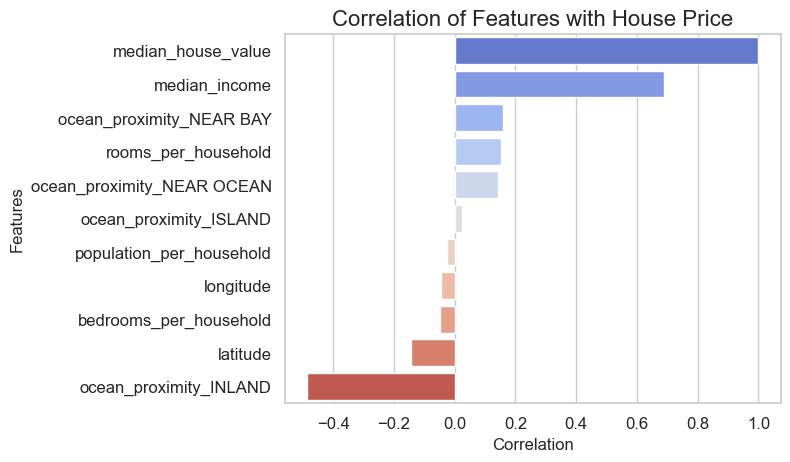

In [11]:
# Correlation Barplot
bar_plot = sns.barplot(x=target_correlations.values, y=target_correlations.index, palette="coolwarm")

plt.title("Correlation of Features with House Price")
bar_plot.set_title("Correlation of Features with House Price", fontsize=16)
bar_plot.set_xlabel("Correlation")
bar_plot.set_ylabel("Features")
bar_plot.tick_params(labelsize=12)
plt.show()

## Data Cleanup

## Model